In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt
%matplotlib inline 
from matplotlib.pylab import rcParams
rcParams['figure.figsize']  = 15, 6
from datetime import datetime 
from pmdarima.arima import auto_arima


In [4]:
#conversão dos atribuitos que estão no fomrato string para o formato ano - mes 
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv(r"C:\Users\leand\OneDrive\Área de Trabalho\CursoCódigos\28.Prática em Python\dados\AirPassengers.csv", 
                    parse_dates = ['Month'], index_col = "Month", date_parser = dateparse )

In [5]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [7]:
stepwise_model = auto_arima(data, start_p = 1, start_q = 1, start_d = 0, start_P = 0, max_p = 6, max_q = 6, m = 12, seasonal = True, trace = True, stepwise = False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.03 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1030.752, Time=0.09 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1032.276, Time=0.19 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1030.408, Time=0.05 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.13 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1034.096, Time=0.30 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.12 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.28 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=1.25 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1020.639, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.11 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1019.494, Time=0.26 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.08 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1020.327, Time=0.24 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1012.991, Time=0.84 sec
 ARIM

In [9]:
print(stepwise_model.aic())

1012.9907965272461


In [10]:
train = data.loc['1949-01-01' : '1959-12-01']
test = data.loc['1960-01-01':]

In [11]:
test

,#Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


In [12]:
stepwise_model.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [15]:
future_forecast = stepwise_model.predict(n_periods = 12)
future_forecast

1960-01-01    420.244910
1960-02-01    398.463207
1960-03-01    461.917713
1960-04-01    450.699537
1960-05-01    474.016763
1960-06-01    537.922266
1960-07-01    612.240477
1960-08-01    623.591895
1960-09-01    520.177136
1960-10-01    462.329440
1960-11-01    412.943810
1960-12-01    453.768301
Freq: MS, dtype: float64

In [19]:
future_forecast = pd.DataFrame(future_forecast, index = test.index, columns = ['#Passengers'])


,#Passengers
Month,
1960-01-01,420.244910
1960-02-01,398.463207
1960-03-01,461.917713
1960-04-01,450.699537
1960-05-01,474.016763
1960-06-01,537.922266
1960-07-01,612.240477
1960-08-01,623.591895
1960-09-01,520.177136


<AxesSubplot:xlabel='Month'>

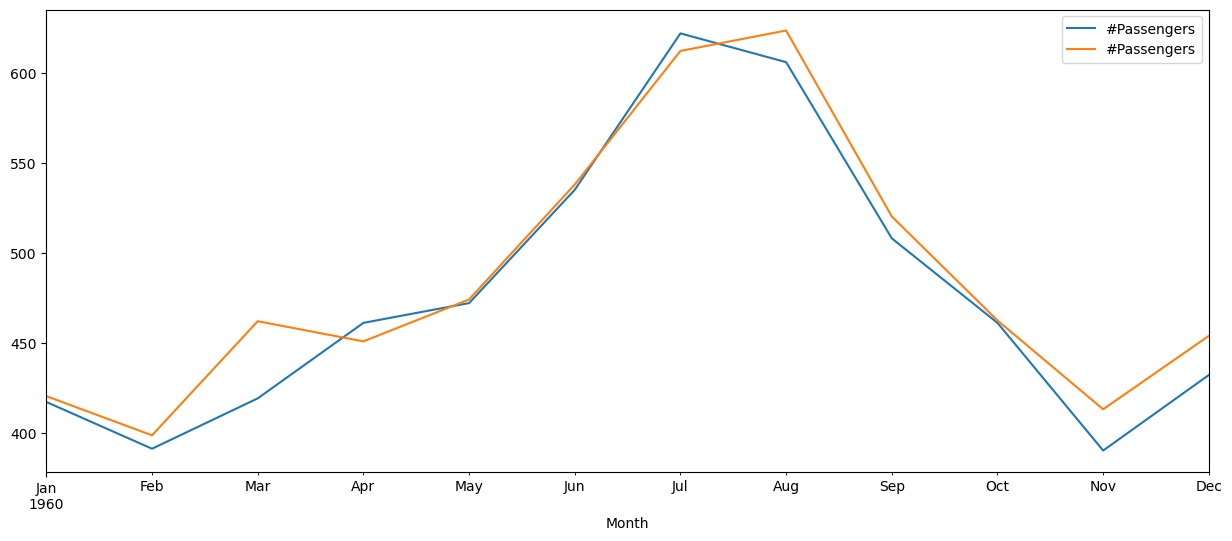

In [17]:
pd.concat([test, future_forecast], axis = 1).plot()

<AxesSubplot:xlabel='Month'>

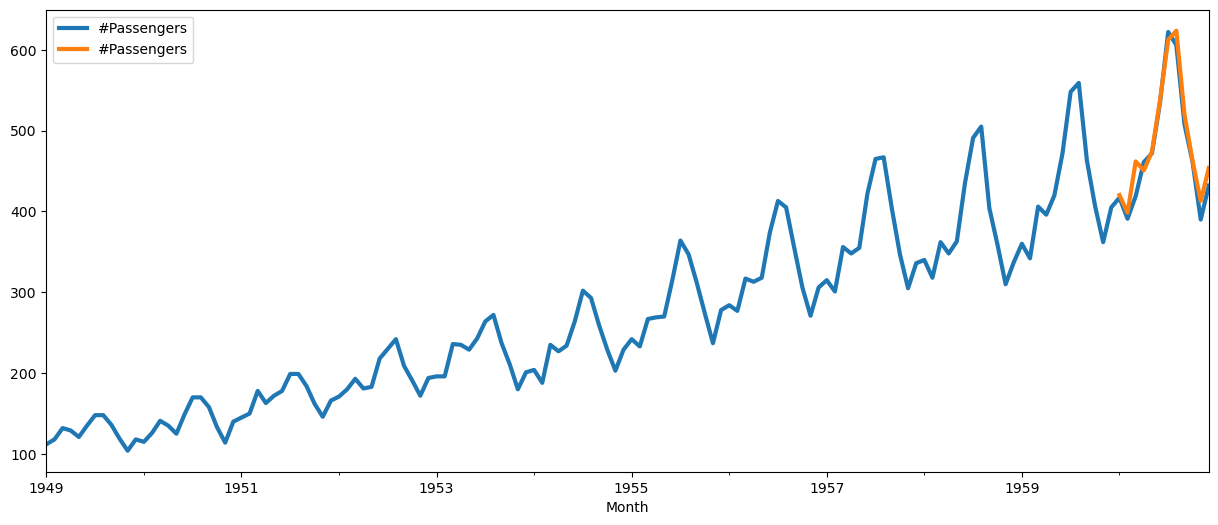

In [18]:
pd.concat([data, future_forecast], axis = 1).plot(linewidth = 3)